In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';', encoding="ANSI")

<BarContainer object of 26 artists>

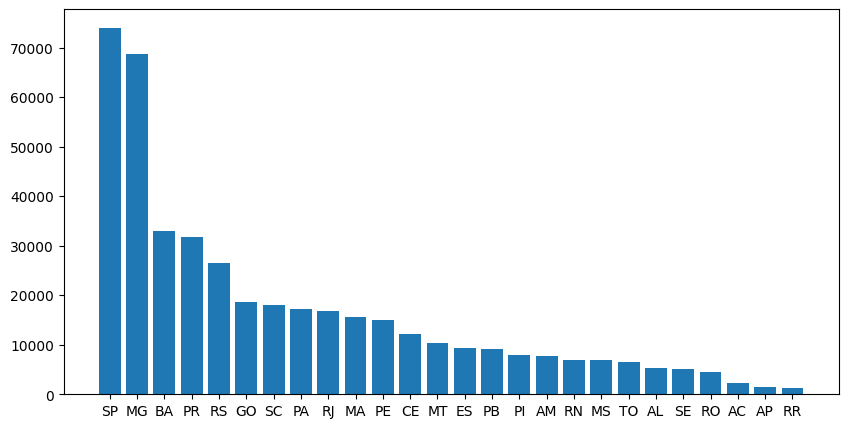

In [24]:
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
candidatos_vereador_uf = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count().sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(candidatos_vereador_uf.index, candidatos_vereador_uf["NM_URNA_CANDIDATO"], width=0.8)

In [ ]:
plt.plot(